In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
url = '/Users/natimarcus/Desktop/DAT-06-24/class material/Unit 3/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bikes.rename(columns={'count':'total_rentals'}, inplace=True)

In [9]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


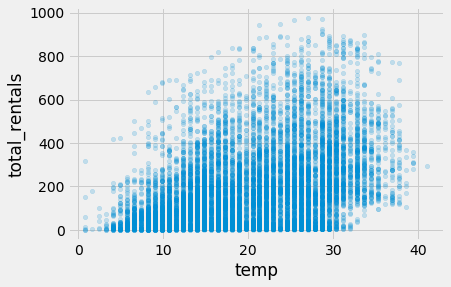

In [12]:
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

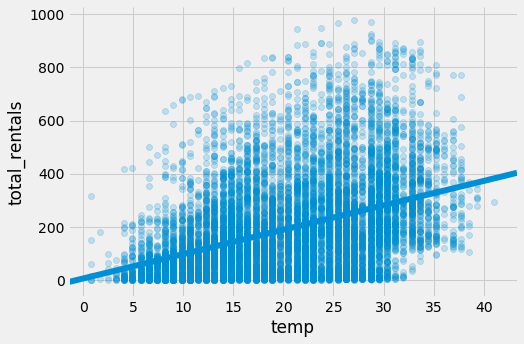

In [13]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

In [14]:
feature_cols = ['temp']
x = bikes[feature_cols]
y = bikes.total_rentals

In [15]:
print(x.shape)

(10886, 1)


In [16]:
print(y.shape)

(10886,)


In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [21]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lr.intercept_ # 'b'

6.046212959616781

In [24]:
lr.coef_ # 'm'

array([9.17054048])

In [28]:
lr.predict(np.array([0]).reshape(1,-1)) # 0 = 'x'

array([6.04621296])

In [29]:
lr.predict(np.array([1]).reshape(1,-1)) #goes up by coef amount

array([15.21675344])

In [30]:
temps = np.array([[5], [6], [10]]) # y = 9.17*{5,6,10} + 6.046
lr.predict(temps)

array([51.89891537, 61.06945585, 97.75161777])

In [31]:
lr.predict(np.array([25]).reshape(1,-1))

array([235.309725])

In [32]:
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


In [33]:
feature_cols = ['temp_F']
x = bikes[feature_cols]
y = bikes.total_rentals

linreg = LinearRegression()
linreg.fit(x, y)

print(linreg.intercept_)
print(linreg.coef_)

-156.98561782129445
[5.09474471]


In [34]:
25 * 1.8 + 32

77.0

In [36]:
linreg.predict(np.array([77]).reshape(1,-1)) #same result as temp in celsius

array([235.309725])

In [38]:
bikes.drop('temp_F', axis=1, inplace=True)

In [39]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

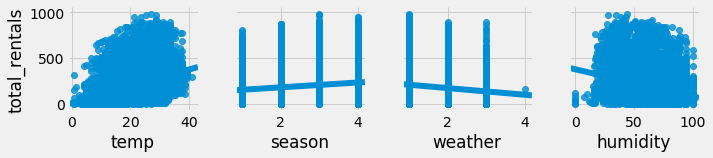

In [41]:
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

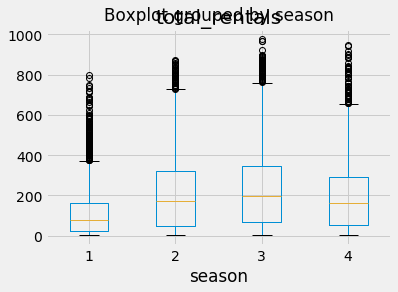

In [43]:
bikes.boxplot(column='total_rentals', by='season');

In [44]:
x = bikes[feature_cols]
y = bikes.total_rentals

lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr.intercept_

159.52068786129817

In [46]:
lr.coef_

array([ 7.86482499, 22.53875753,  6.67030204, -3.11887338])

In [47]:
lr.score(x,y) #shows r^2 --> how much x effects y

0.2582975832728214